In [1]:
from lxml import html
import requests

In [2]:
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' )

'en_US.UTF-8'

In [3]:
import matplotlib.pyplot as plt

In [4]:
plt.rcParams["figure.figsize"] = (20,10)

In [5]:
def get_data(country):
    
    if country == 'China':
        url = 'https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic_in_mainland_China'
    elif country == 'CZ':
        url = 'https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_the_Czech_Republic'
    elif country == 'UK':
        url = 'https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_the_United_Kingdom'
    elif country == 'US':
        url = 'https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_the_United_States'
    else:
        url = "https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_{}".format(country)
    if country == 'China':
        xpath1 = '/html/body/div[3]/div[3]/div[4]/div/div[3]/div/table/tbody/tr[*]/td[4]/span[1]'
        xpath2 = '/html/body/div[3]/div[3]/div[4]/div/div[3]/div/table/tbody/tr[*]/td[3]/span/span[1]'
        page = requests.get(url)
        tree = html.fromstring(page.content)
        values1 = tree.xpath(xpath1)
        values2 = tree.xpath(xpath2)
        values = []
        for i,v in enumerate(values1):
            if v.text is None:
                values.append(values2[i])
            else:
                values.append(v)
    else:
        if country == 'CZ':
            xpath = '/html/body/div[3]/div[3]/div[4]/div/table[3]/tbody/tr[*]/td[2]'
        elif country == 'US':
            xpath = '/html/body/div[3]/div[3]/div[4]/div/div[2]/div/table/tbody/tr[*]/td[3]/span/span[1]'
        elif country == 'South_Korea':
            xpath = '/html/body/div[3]/div[3]/div[4]/div/div[9]/div/table/tbody/tr[*]/td[3]/span/span[1]'
        else:
            xpath = '/html/body/div[3]/div[3]/div[4]/div/div[3]/div/table/tbody/tr[*]/td[3]/span/span[1]'
        page = requests.get(url)
        tree = html.fromstring(page.content)
        values = tree.xpath(xpath)
    values_f = [locale.atoi(x.text) for x in values]
    return values_f

In [6]:
china = get_data('China')

In [7]:
italy = get_data('Italy')

In [8]:
germany = get_data('Germany')

In [9]:
uk = get_data('UK')

In [10]:
usa = get_data('US')

In [11]:
cz = get_data('CZ')

In [12]:
skorea = get_data('South_Korea')

In [13]:
japan = get_data('Japan')

In [14]:
france = get_data('France')

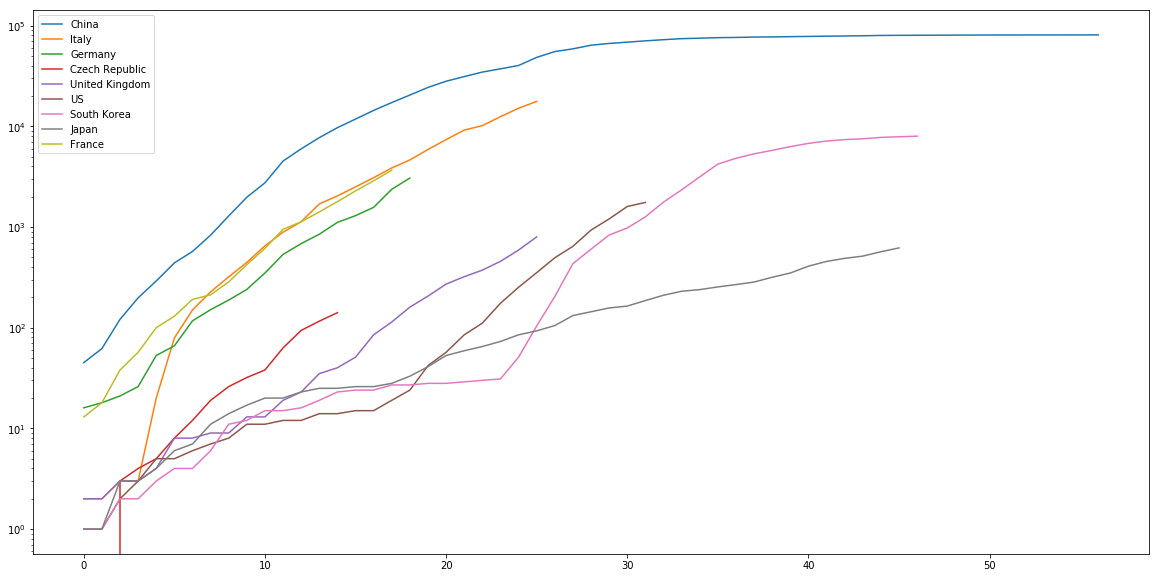

In [15]:
plt.plot(china,label='China')
plt.plot(italy,label='Italy')
plt.plot(germany,label='Germany')
plt.plot(cz,label='Czech Republic')
plt.plot(uk,label='United Kingdom')
plt.plot(usa,label='US')
plt.plot(skorea,label='South Korea')
plt.plot(japan,label='Japan')
plt.plot(france,label='France')
plt.legend()
plt.yscale('log')